# Read data 

In [5]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('E:/MS Research/Research/Data/Processed_datasets/Processed_Windows_dataset/windows10_dataset.csv',na_values=[' '])
df.head()

,ts,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ C3_Time,Processor_pct_ Interrupt_Time,Processor_pct_ C2_Time,Processor_pct_ User_Time,Processor_pct_ C1_Time,Processor_pct_ Processor_Time,Processor_C1_ransitions_sec,...,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer,label,type
0,1554206309,4,29.908172,0.0,0.078240,0.0,61.027509,29.908172,66.200149,480.094991,...,0.134876,0.163098,2.822198,1.924988e+06,402.582784,9100.481592,13.487612,0.000405,0,normal
1,1554206319,9,31.751682,0.0,0.312521,0.0,59.144594,31.751682,66.247735,427.041284,...,0.157564,0.189279,3.171506,1.497233e+06,355.134332,11153.554490,15.756429,0.000533,0,normal
2,1554206329,5,29.495167,0.0,1.168222,0.0,46.027940,29.495167,66.900381,1159.426821,...,0.401774,0.782472,38.069810,1.854229e+06,760.431768,26994.265950,40.177378,0.001028,0,normal
3,1554206339,12,18.224375,0.0,1.097192,0.0,47.806219,18.224375,79.545208,736.622011,...,0.259062,0.768934,50.987167,1.591239e+07,699.499954,53141.663800,25.906233,0.001099,0,normal
4,1554206349,12,14.861187,0.0,1.562431,0.0,41.873151,14.861187,82.735137,896.108598,...,0.103836,1.081730,97.789353,2.360930e+07,1184.550425,40988.684440,10.383619,0.000913,0,normal


In [6]:
# Get the dimensions of the DataFrame
rows, columns = df.shape

# Print the dimensions
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 35975
Number of columns: 127


In [9]:
# Calculate the percentage of missing values per column
missing_values_percent = (df.isna().sum() / len(df)) * 100

# Sort the values in descending order
missing_values_percent = missing_values_percent.sort_values(ascending=False)

# Print the result
missing_values_percent.head(10)

Process_IO Read Bytes_sec          1.495483
Process_IO Read_Operations_sec     1.164698
Process_IO Data Operations_sec     0.920083
Process_IO Other Operations_sec    0.683808
Process_IO Data Bytes_sec          0.678249
Process_Page Faults_sec            0.644892
Process_IO_Other_Bytes_sec         0.517026
Process_pct_ User_Time             0.508687
Process_IO_Write Operations_sec    0.428075
Process_IO_Write_Bytes_sec         0.325226
dtype: float64

In [10]:
# Missing value is less than 1.5%, so we can drop them and use the complete case.

# Remove rows with any missing values
df = df.dropna()

In [11]:
# Get the dimensions of the DataFrame
rows, columns = df.shape

# Print the dimensions
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 35214
Number of columns: 127


In [12]:
# Identify columns with only a single unique value
single_value_columns = df.columns[df.nunique() == 1]
single_value_columns

Index(['Processor_pct_ C3_Time', 'Processor_pct_ C2_Time',
       'Processor_C2_ransitions_sec', 'Processor_C3_ransitions_sec',
       'Process_Elapsed_Time', 'Process_Creating Process ID',
       'Process_ID Process', 'Process_Priority Base',
       'Network_I(Intel R _82574L_GNC) Packets Received Unknown',
       'Network_I(Intel R _82574L_GNC) Packets Outbound Errors',
       'Network_I(Intel R _82574L_GNC) Packets Received Discarded',
       'Network_I(Intel R _82574L_GNC) Packets Outbound Discarded',
       'Network_I(Intel R _82574L_GNC) TCP RSC Exceptions sec',
       'Network_I(Intel R _82574L_GNC) Output Queue Length',
       'Network_I(Intel R _82574L_GNC) Packets Sent Non-Unicast sec',
       'Network_I(Intel R _82574L_GNC) Packets Received Non-Unicast sec',
       'Network_I(Intel R _82574L_GNC) TCP RSC Coalesced Packets sec',
       'Network_I(Intel R _82574L_GNC) Offloaded Connections',
       'Network_I(Intel R _82574L_GNC) Packets Received Errors'],
      dtype='object'

In [13]:
df = df.drop(columns=single_value_columns)

In [14]:
# Get the dimensions of the DataFrame after dropping unnecessary columns
rows, columns = df.shape

# Print the dimensions
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 35214
Number of columns: 108


We removed the missing entries and remove the variables which have only a single value for all the etries or variability was zero.

# Required Libraries

We are going to use Windows 10 system generated values to predict whether the system is under cyber attack or not !

In [15]:
import numpy as np
from numpy.ma.core import ceil
from scipy.spatial import distance #distance calculation
from sklearn.preprocessing import MinMaxScaler #normalisation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Loading the data and EDA


In [16]:
# Attack counts by type:
pd.crosstab(index=df['label'], columns=df['type'])

type,ddos,dos,injection,mitm,normal,password,scanning,xss
label,,,,,,,,
0,0,0,0,0,24283,0,0,0
1,4539,505,606,13,0,3594,434,1240


In [17]:
df = df.drop(columns='ts')

# Making the data balance (Under sampling)

In [319]:
#df = df_new

In [18]:
freq = df['label'].value_counts()
freq

0    24283
1    10931
Name: label, dtype: int64

In [19]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

#plt.pie(mydata,labels = mylabels, autopct=autopct_format(mydata))

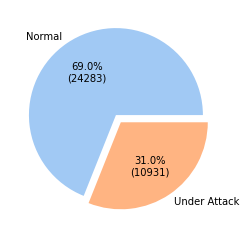

In [20]:
import matplotlib.pyplot as plt
import seaborn
  
# declaring data
data = [freq[0], freq[1]]
keys = ['Normal', 'Under Attack']
  
# declaring exploding pie
explode = [0, 0.1]
# define Seaborn color palette to use
palette_color = seaborn.color_palette('pastel')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct=autopct_format(data))
  
# displaying chart
plt.show()

In [21]:
freq = df['label'].value_counts()
delete_frac = round((freq[0] - freq[1])/freq[0],2)
df = df.drop(df.query('label == 0').sample(frac= delete_frac).index)
df['label'].value_counts()

1    10931
0    10927
Name: label, dtype: int64

In [22]:
df.shape

(21858, 107)

# Investigating the correlation

In [23]:
X = df.iloc[:,0:105]

In [32]:
cormat = X.corr()
round(cormat,2)

,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ Interrupt_Time,Processor_pct_ User_Time,Processor_pct_ C1_Time,Processor_pct_ Processor_Time,Processor_C1_ransitions_sec,Processor_pct_ DPC_Time,Processor_pct_ Privileged_Time,Processor_DPCs_Queued_sec,...,LogicalDisk(_Total) pct_ Disk Time,LogicalDisk(_Total) Avg Disk Bytes Read,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer
Processor_DPC_Rate,1.00,-0.25,0.06,0.03,-0.25,0.20,0.69,0.44,0.33,0.77,...,0.53,0.02,0.12,0.69,0.65,0.54,0.74,-0.00,0.05,0.01
Processor_pct_ Idle_Time,-0.25,1.00,-0.42,-0.85,1.00,-0.99,-0.21,-0.43,-0.77,-0.31,...,-0.23,-0.20,-0.11,-0.27,-0.26,-0.33,-0.31,-0.04,-0.06,-0.10
Processor_pct_ Interrupt_Time,0.06,-0.42,1.00,0.19,-0.42,0.41,0.09,0.50,0.53,0.10,...,0.11,0.07,0.11,0.05,0.08,0.16,0.04,0.12,0.08,0.09
Processor_pct_ User_Time,0.03,-0.85,0.19,1.00,-0.85,0.87,-0.07,0.17,0.33,0.04,...,0.03,0.21,0.03,0.03,0.04,0.09,0.06,0.05,0.01,0.07
Processor_pct_ C1_Time,-0.25,1.00,-0.42,-0.85,1.00,-0.99,-0.21,-0.43,-0.77,-0.31,...,-0.23,-0.20,-0.11,-0.27,-0.26,-0.33,-0.31,-0.04,-0.06,-0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LogicalDisk(_Total) Disk Write Bytes sec,0.54,-0.33,0.16,0.09,-0.33,0.27,0.70,0.31,0.39,0.65,...,0.63,0.19,0.34,0.67,0.64,1.00,0.68,0.14,0.26,0.08
LogicalDisk(_Total) Disk Transfers sec,0.74,-0.31,0.04,0.06,-0.31,0.26,0.89,0.41,0.41,0.94,...,0.64,0.02,0.18,0.83,0.78,0.68,1.00,-0.03,0.08,-0.01
LogicalDisk(_Total) Avg Disk Bytes Transfer,-0.00,-0.04,0.12,0.05,-0.04,0.04,0.02,0.17,0.01,0.01,...,0.01,0.21,0.04,-0.01,-0.01,0.14,-0.03,1.00,0.04,0.11
LogicalDisk(_Total) pct_ Disk Write Time,0.05,-0.06,0.08,0.01,-0.06,0.02,0.13,0.02,0.03,0.07,...,0.65,0.13,0.98,0.31,0.18,0.26,0.08,0.04,1.00,0.46


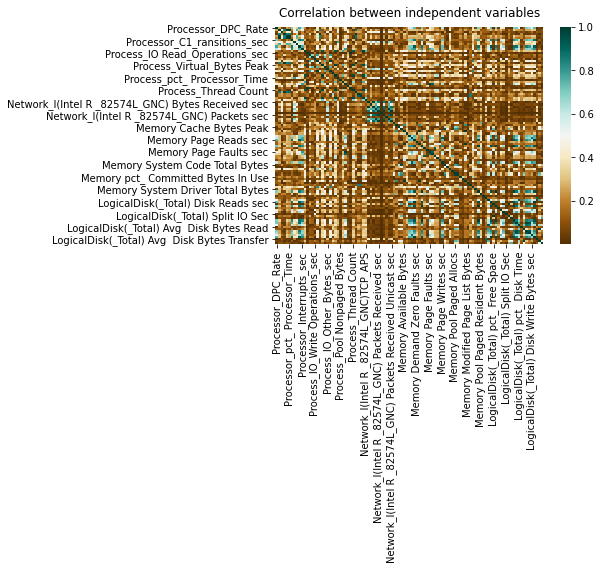

In [33]:
import seaborn as sns
mask = np.triu(np.ones_like(X.corr().abs(), dtype=np.bool))

heatmap = sns.heatmap(X.corr().abs(),annot=False,cmap='BrBG')
heatmap.set_title('Correlation between independent variables', fontdict={'fontsize':12}, pad=10);

In [34]:
# calculate the correlation matrix and reshape
df_corr = X.corr().abs().stack().reset_index()

# rename the columns
df_corr.columns = ['FEATURE_1', 'FEATURE_2', 'CORRELATION']
df_corr.head()

,FEATURE_1,FEATURE_2,CORRELATION
0,Processor_DPC_Rate,Processor_DPC_Rate,1.000000
1,Processor_DPC_Rate,Processor_pct_ Idle_Time,0.249900
2,Processor_DPC_Rate,Processor_pct_ Interrupt_Time,0.062788
3,Processor_DPC_Rate,Processor_pct_ User_Time,0.033702
4,Processor_DPC_Rate,Processor_pct_ C1_Time,0.249900


In [35]:
df_corr = df_corr[df_corr['FEATURE_1'] != df_corr['FEATURE_2']]

In [36]:
df_corr_perfect = df_corr[df_corr.CORRELATION == 1]

In [37]:
df_corr_perfect

,FEATURE_1,FEATURE_2,CORRELATION
109,Processor_pct_ Idle_Time,Processor_pct_ C1_Time,1.0
421,Processor_pct_ C1_Time,Processor_pct_ Idle_Time,1.0
1701,Process_Page_File Bytes,Process_Private_Bytes,1.0
2221,Process_Private_Bytes,Process_Page_File Bytes,1.0
4139,Network_I(Intel R _82574L_GNC) Packets Sent Un...,Network_I(Intel R _82574L_GNC) Packets Sent sec,1.0
4245,Network_I(Intel R _82574L_GNC) Packets Receive...,Network_I(Intel R _82574L_GNC) Packets Receive...,1.0
4659,Network_I(Intel R _82574L_GNC) Packets Sent sec,Network_I(Intel R _82574L_GNC) Packets Sent Un...,1.0
4765,Network_I(Intel R _82574L_GNC) Packets Receive...,Network_I(Intel R _82574L_GNC) Packets Receive...,1.0
5306,Memory Available Bytes,Memory Available KBytes,1.0
5930,Memory Available KBytes,Memory Available Bytes,1.0


In [38]:
# Relabel the row numbers
df_corr_perfect.reset_index(drop=True, inplace=True)

# Delete even rows
df_corr_perfect = df_corr_perfect[df_corr_perfect.index % 2 != 0]
df_corr_perfect


,FEATURE_1,FEATURE_2,CORRELATION
1,Processor_pct_ C1_Time,Processor_pct_ Idle_Time,1.0
3,Process_Private_Bytes,Process_Page_File Bytes,1.0
5,Network_I(Intel R _82574L_GNC) Packets Receive...,Network_I(Intel R _82574L_GNC) Packets Receive...,1.0
7,Network_I(Intel R _82574L_GNC) Packets Receive...,Network_I(Intel R _82574L_GNC) Packets Receive...,1.0
9,Memory Available KBytes,Memory Available Bytes,1.0


In [39]:
lst1 = df_corr_perfect.FEATURE_1
remove_var = list(set(lst1))

In [40]:
df = df.drop(remove_var, axis=1)

In [41]:
df.shape

(21858, 102)

In [42]:
df.head()

,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ Interrupt_Time,Processor_pct_ User_Time,Processor_pct_ Processor_Time,Processor_C1_ransitions_sec,Processor_pct_ DPC_Time,Processor_pct_ Privileged_Time,Processor_DPCs_Queued_sec,Processor_Interrupts_sec,...,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer,label,type
3,12,18.224375,1.097192,47.806219,79.545208,736.622011,0.313483,31.740194,894.340589,6617.558513,...,0.259062,0.768934,50.987167,1.591239e+07,699.499954,53141.66380,25.906233,0.001099,0,normal
4,12,14.861187,1.562431,41.873151,82.735137,896.108598,0.703094,40.857571,1381.842235,7302.095730,...,0.103836,1.081730,97.789353,2.360930e+07,1184.550425,40988.68444,10.383619,0.000913,0,normal
8,3,23.961375,0.624038,39.626426,72.854338,2141.205491,0.234014,33.230035,639.116640,5112.134350,...,0.098541,0.251544,15.300358,1.462362e+07,439.024507,65097.94132,9.854080,0.000573,0,normal
9,3,61.473132,0.704204,21.047862,36.308699,2936.251094,0.234735,15.257744,2955.981003,3748.983123,...,0.004243,0.740462,73.621908,3.435608e+03,2808.056763,5065.30851,0.424339,0.000264,0,normal
10,52,56.220035,0.780054,23.323609,37.127663,1427.130982,0.078005,13.806952,1280.054515,2352.824071,...,0.020561,0.648671,62.811001,6.107684e+06,1128.484878,11238.99345,2.056146,0.000575,0,normal


In [43]:
# Remove the multiple attack types column
df = df.drop('type', axis=1)

## Seperating independent and dependent variables:

In [44]:
# Removing Y and Id
X = df.iloc [: ,:-1].values    # independent variables
# Keeping only Y
y = df.iloc [: , -1].values    # dependent variables

## Handling Inf values:


In [45]:
import numpy as np

# find min and max values for each column, ignoring nan, -inf, and inf
mins = [np.nanmin(X[:, i][X[:, i] != -np.inf]) for i in range(X.shape[1])]
maxs = [np.nanmax(X[:, i][X[:, i] != np.inf]) for i in range(X.shape[1])]

# go through matrix one column at a time and replace  + and -infinity 
# with the max or min for that column
for i in range(X.shape[1]):
    X[:, i][X[:, i] == -np.inf] = mins[i]
    X[:, i][X[:, i] == np.inf] = maxs[i]

## Standardizing all numerical columns 

In [46]:
# feature Scaling
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [47]:
df.shape

(21858, 101)

# Train test Split

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2)

# Supervised Model selection

In [67]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

In [50]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [10,20,50],
            'kernel': ['rbf','poly','sigmoid','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [50,100,200],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth' : [5,15,25],
            'criterion' : ['gini', 'entropy']
        }
    }
}

In [51]:
import time
start = time.time()

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
model_output = pd.DataFrame(scores,columns=['model','best_score','best_params'])


end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("Execution time: "+"{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

Execution time: 00:30:47.88


In [52]:
model_output

,model,best_score,best_params
0,svm,0.971063,"{'C': 50, 'kernel': 'linear'}"
1,random_forest,0.987933,"{'criterion': 'entropy', 'max_depth': 25, 'max..."


In [53]:
model_output.best_params[0]

{'C': 50, 'kernel': 'linear'}

In [58]:
svm= SVC(gamma='auto',C = 50,kernel = 'linear') 
svm.fit(X_train, y_train)
# Measure model performance
y_pred_svm = svm.predict(X_test)

In [61]:
# Calculate the metrics
print('Test Accuracy: %.3f' % accuracy_score(y_test, y_pred_svm))
print('Test Precision: %.3f' % precision_score(y_test, y_pred_svm))
print('Test Recall: %.3f' % recall_score(y_test, y_pred_svm))
print('Test F-1: %.3f' % f1_score(y_test, y_pred_svm))

Test Accuracy: 0.968
Test Precision: 0.949
Test Recall: 0.990
Test F-1: 0.969


In [62]:
model_output.best_params[1]

{'criterion': 'entropy',
 'max_depth': 25,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [63]:
forest=RandomForestClassifier( n_estimators= 100, max_depth=25, criterion='entropy',max_features = 'sqrt')
forest.fit(X_train, y_train)
# Measure model performance
y_pred_rf = forest.predict(X_test)

In [64]:
# Calculate the metrics
print('Test Accuracy: %.3f' % accuracy_score(y_test, y_pred_rf))
print('Test Precision: %.3f' % precision_score(y_test, y_pred_rf))
print('Test Recall: %.3f' % recall_score(y_test, y_pred_rf))
print('Test F-1: %.3f' % f1_score(y_test, y_pred_rf))

Test Accuracy: 0.986
Test Precision: 0.974
Test Recall: 0.998
Test F-1: 0.986


Between the two supervised model random forest is the clear winner and the test accuracy is 98.6%.

In [68]:
# Random forest
forest.fit(X_train, y_train)
y_pred_prob_rf = forest.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(y_test, y_pred_prob_rf)

In [69]:
# SVM 
modelSVMlinear=svm.SVC(gamma='auto',C = 50,kernel = 'linear', probability=True)
modelSVMlinear.fit(X_train, y_train)
y_pred_prob_SVMlinear = modelSVMlinear.predict_proba(X_test)[:,1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(y_test, y_pred_prob_SVMlinear)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(y_test, y_pred_prob_SVMlinear)

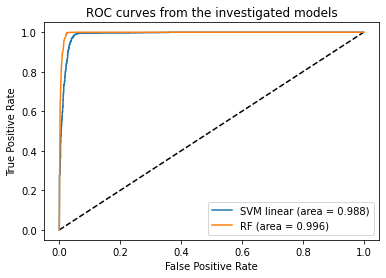

In [70]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label='SVM linear (area = %0.3f)' % roc_auc_SVMlinear)
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

# Unsupervised modelling:

## SOM

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Minisom library and module is used for performing Self Organizing Maps
from minisom import MiniSom
from sklearn.base import BaseEstimator, TransformerMixin

In [85]:
class MiniSomWrapper(BaseEstimator, TransformerMixin):
    def __init__(self, som_shape=(1, 2), sigma=1.0, learning_rate=0.5, neighborhood_function='gaussian'):
        self.som_shape = som_shape
        self.sigma = sigma
        self.learning_rate = learning_rate
        self.neighborhood_function = neighborhood_function
        self.som = None

    def fit(self, X, y=None):
        self.som = MiniSom(self.som_shape[0], self.som_shape[1], X.shape[1],
                           sigma=self.sigma, learning_rate=self.learning_rate,
                           neighborhood_function=self.neighborhood_function)
        self.som.pca_weights_init(X)
        self.som.train_random(X, 100, verbose=False)
        return self

    def transform(self, X):
        return classify(self.som, X)

    def predict(self, X):
        return self.transform(X)

In [91]:
start = time.time()
# Define the parameter grid
param_grid = {
    'sigma': [1,2, 4, 6],
    'learning_rate': [.05,0.1, 0.5, 0.8],
    'neighborhood_function': ['gaussian', 'triangle']
}

# Create an instance of the MiniSomWrapper model
som = MiniSomWrapper(som_shape=(1, 2))

# Create a grid search object
grid_search = GridSearchCV(som, param_grid, scoring='accuracy', cv=10)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("Execution time: "+"{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

Execution time: 00:01:31.28


In [92]:
# Print the best parameters and the corresponding classification report
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'neighborhood_function': 'gaussian', 'sigma': 1}


In [93]:
# Calculate the metrics
print('Test Accuracy: %.3f' % accuracy_score(y_test, classify(grid_search.best_estimator_.som, X_test)))
print('Test Precision: %.3f' % precision_score(y_test, classify(grid_search.best_estimator_.som, X_test)))
print('Test Recall: %.3f' % recall_score(y_test, classify(grid_search.best_estimator_.som, X_test)))
print('Test F-1: %.3f' % f1_score(y_test, classify(grid_search.best_estimator_.som, X_test)))

Test Accuracy: 0.826
Test Precision: 0.742
Test Recall: 1.000
Test F-1: 0.852


## K-means clustering 

In [99]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV



In [ ]:
start = time.time()

# Define the parameter grid
param_grid = {
    'n_init': [50, 100, 200],
    'init': ['k-means++', 'random'],
    'algorithm': ['auto', 'full', 'elkan']
}

# Create the KMeans instance
kmeans = KMeans(n_clusters = 2)

# Create the GridSearchCV instance
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, cv=10)

# Fit the data to perform grid search
grid_search.fit(X_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Fit the best model on the data
best_model.fit(X_train)

# Predict the cluster labels
labels = best_model.predict(X_test)

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("Execution time: "+"{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

In [ ]:
# Print the best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

In [ ]:
# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, labels)
precision = precision_score(y_test, labels, average='macro')
recall = recall_score(y_test, labels, average='macro')
f_score = f1_score(y_test, labels, average='macro')

# Print the evaluation metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F-score: ", f_score)

In [362]:
#Now let's open it with pandas
import pandas as pd
from pandas import Series,DataFrame
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import numpy as np
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics 


import warnings
warnings.filterwarnings('ignore')

In [363]:
def k_means_fit(covariates,centroid_method):
    data = pd.DataFrame(covariates)
    # from sklearn.cluster import KMeans 
    clusters = 2
    number_of_iteration = 100
    kmeans = KMeans(n_clusters = clusters,n_init= number_of_iteration,init = centroid_method,algorithm = "full") 
    kmeans.fit(data) 
    
    y_labels_test = kmeans.predict(X_test)
    tab = pd.crosstab(index=y_test, columns=y_labels_test)
    print (metrics.classification_report(y_test,y_labels_test))

In [364]:
k_means_fit(X_train,centroid_method = "random")

              precision    recall  f1-score   support

           0       0.24      0.31      0.27      2186
           1       0.00      0.00      0.00      2186

    accuracy                           0.16      4372
   macro avg       0.12      0.16      0.14      4372
weighted avg       0.12      0.16      0.14      4372



# Hierchical clustering 

In [365]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X_test)
print (metrics.classification_report(y_test,cluster.labels_))

              precision    recall  f1-score   support

           0       0.86      0.70      0.77      2186
           1       0.74      0.88      0.81      2186

    accuracy                           0.79      4372
   macro avg       0.80      0.79      0.79      4372
weighted avg       0.80      0.79      0.79      4372



# Result

Among these three clustering methods K-means clustering giving us the best classification accuracy which is 84%.

In [366]:
y_train.shape

(17486,)

In [367]:
y_test.shape

(4372,)